# PCA and $K$-means on simulated data

## a. Generate data

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns; sns.set_style('whitegrid')

In [15]:
class_1 = np.random.uniform(low=0, high=1, size=1000).reshape(20, 50)
class_2 = np.random.uniform(low=0, high=2, size=1000).reshape(20, 50)
class_3 = np.random.uniform(low=0, high=3, size=1000).reshape(20, 50)
data = np.concatenate((class_1, class_2, class_3))
data = pd.DataFrame(data, columns=['X'+str(i) for i in range(1, 51)])
data['class'] = 20*[1] + 20*[2] + 20*[3]
data.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X42,X43,X44,X45,X46,X47,X48,X49,X50,class
0,0.206085,0.548891,0.483345,0.430228,0.084926,0.457959,0.313941,0.796469,0.899392,0.140730,...,0.803371,0.575263,0.868178,0.887051,0.659624,0.130191,0.271975,0.206966,0.272497,1
1,0.549837,0.654331,0.679153,0.088327,0.920253,0.721935,0.079815,0.816096,0.702062,0.390909,...,0.082494,0.681500,0.621130,0.090764,0.630456,0.398784,0.879749,0.637703,0.653399,1
2,0.834361,0.807387,0.186267,0.497567,0.470530,0.965813,0.960205,0.917021,0.269370,0.246568,...,0.649654,0.079688,0.064122,0.702819,0.312329,0.822282,0.177533,0.227268,0.157189,1
3,0.485799,0.830802,0.311301,0.787556,0.177693,0.451556,0.901479,0.970518,0.929537,0.944158,...,0.504830,0.045807,0.168133,0.188069,0.998266,0.684840,0.206639,0.748141,0.650031,1
4,0.323639,0.559594,0.433228,0.981336,0.235406,0.479690,0.232493,0.950931,0.596846,0.113195,...,0.502297,0.820850,0.542294,0.151900,0.723607,0.603645,0.119756,0.913848,0.466831,1


## b. PCA

In [17]:
from sklearn.decomposition import PCA

pca = PCA()
data_trans = pd.DataFrame(pca.fit_transform(data.drop(columns=['class'])), 
                          columns=['Z'+str(i) for i in range(1, 51)])
data_trans['class'] = 20*[1] + 20*[2] + 20*[3]
data_trans.head()

,Z1,Z2,Z3,Z4,Z5,Z6,Z7,Z8,Z9,Z10,...,Z42,Z43,Z44,Z45,Z46,Z47,Z48,Z49,Z50,class
0,-3.197494,0.205622,-0.441883,-0.256300,0.203960,-0.353133,0.472105,0.034966,0.026696,0.186835,...,0.113655,0.031458,0.110456,-0.094083,-0.093648,0.194276,0.256539,0.055143,-0.003031,1
1,-3.377112,-0.388694,0.082136,0.362302,0.228215,0.261574,-0.501082,-0.484285,-0.150148,-0.440468,...,0.057817,-0.178044,0.209686,0.150724,-0.132578,0.062330,-0.014915,-0.030767,0.006091,1
2,-3.962193,0.178716,0.212917,0.404123,-0.071486,0.267885,0.302552,-0.940849,-0.250239,-0.387476,...,-0.383477,0.267378,-0.250597,-0.173644,0.058662,-0.110632,0.174202,-0.053465,0.030769,1
3,-2.973925,0.110673,-0.380835,0.118737,-0.252083,-0.154925,0.080041,-0.069936,-0.091114,0.446387,...,0.076662,0.028786,0.345715,0.146093,0.171473,-0.248217,-0.094597,-0.127434,0.150054,1
4,-3.645312,0.102917,-0.161366,0.346589,0.374630,0.161183,-0.680470,0.095888,0.020735,0.602909,...,0.176197,0.056955,0.274409,0.044277,0.098239,0.230063,0.273771,-0.051816,-0.029336,1


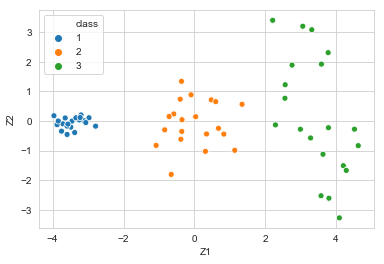

In [20]:
sns.scatterplot(x=data_trans['Z1'], y=data_trans['Z2'], data=data,
                hue='class', palette=sns.color_palette(n_colors=3))

## c. $K$-means clustering on full dataset with $K$=3

In [58]:
from sklearn.cluster import KMeans

kmeans3 = KMeans(n_clusters=3, random_state=0)
kmeans3.fit(data.drop(columns=['class']))

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)

In [74]:
class_labels = pd.DataFrame({'true': data['class'], 
                             'K=3, full': kmeans3.labels_})
class_labels['K=3, full'].value_counts()

0    21
1    20
2    19
Name: K=3, full, dtype: int64

It appears that `kmeans` labeled clusters differently, so we'll adjust. There's a bit of guesswork but it appears the true cluster label $\rightarrow$ kmeans cluster label mapping is $1\mapsto 1, 2 \mapsto 0, 3 \mapsto 2$.

In [63]:
map = {0:2, 1:1, 2:3}
class_labels.loc[:, 'K=3, full'] = [map[label] for label 
                                 in class_labels['K=3, full']]

In [64]:
# percentage of class labels kmeans got right
np.sum(class_labels['true'] == class_labels['K=3, full'])/60

0.9833333333333333

## d. $K$-means clustering on full dataset with $K$=2

In [ ]:
kmeans2 = KMeans(n_clusters=2, random_state=0)
kmeans2.fit(data.drop(columns=['class']))

In [75]:
class_labels['K=2, full'] = kmeans2.labels_
class_labels['K=2, full'].value_counts()

1    31
0    29
Name: K=2, full, dtype: int64

In [76]:
class_labels[class_labels['true'] == 1]

,true,"K=3, full","K=2, full"
0,1,1,1
1,1,1,1
2,1,1,1
3,1,1,1
4,1,1,1
5,1,1,1
6,1,1,1
7,1,1,1
8,1,1,1
9,1,1,1


In [71]:
class_labels[class_labels['true'] == 2]

,true,"K=3, full","K=2, full"
20,2,2,0
21,2,2,0
22,2,2,0
23,2,2,1
24,2,2,0
25,2,2,1
26,2,2,0
27,2,2,1
28,2,2,1
29,2,2,0


In [79]:
class_labels[class_labels['true'] == 2]['K=2, full'].value_counts()

1    11
0     9
Name: K=2, full, dtype: int64

In [77]:
class_labels[class_labels['true'] == 3]

,true,"K=3, full","K=2, full"
40,3,2,0
41,3,2,0
42,3,2,0
43,3,2,0
44,3,2,0
45,3,2,0
46,3,2,0
47,3,2,0
48,3,2,0
49,3,2,0


For $K=2$, the algorithm correctly separated classes 1 and 3, and assigned class 2 to class 1 and 3 in roughly equal proportion.

## e. $K$-means clustering on full dataset with $K$=4

In [82]:
kmeans4 = KMeans(n_clusters=4, random_state=0)
kmeans4.fit(data.drop(columns=['class']))

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)

In [83]:
class_labels['K=4, full'] = kmeans4.labels_
class_labels['K=4, full'].value_counts()

0    20
2    19
3    18
1     3
Name: K=4, full, dtype: int64

In [84]:
class_labels[class_labels['K=4, full'] == 0]

,true,"K=3, full","K=2, full","K=4, full"
0,1,1,1,0
1,1,1,1,0
2,1,1,1,0
3,1,1,1,0
4,1,1,1,0
5,1,1,1,0
6,1,1,1,0
7,1,1,1,0
8,1,1,1,0
9,1,1,1,0


In [85]:
class_labels[class_labels['K=4, full'] == 1]

,true,"K=3, full","K=2, full","K=4, full"
48,3,2,0,1
58,3,2,0,1
59,3,2,0,1


In [86]:
class_labels[class_labels['K=4, full'] == 2]

,true,"K=3, full","K=2, full","K=4, full"
20,2,0,0,2
21,2,0,0,2
22,2,0,0,2
23,2,0,1,2
24,2,0,0,2
25,2,0,1,2
26,2,0,0,2
27,2,0,1,2
28,2,0,1,2
29,2,0,0,2


In [87]:
class_labels[class_labels['K=4, full'] == 3]

,true,"K=3, full","K=2, full","K=4, full"
33,2,0,0,3
40,3,2,0,3
41,3,2,0,3
42,3,2,0,3
43,3,2,0,3
44,3,2,0,3
45,3,2,0,3
46,3,2,0,3
47,3,2,0,3
49,3,2,0,3


$K=4$ almost correctly identified clusters 1, 2, and 3. The exception was a fourth cluster formed from 3 observations from class 3 (presumably very close to each other).

## f. $K$-means clustering on first two principal components with $K$=3

In [89]:
kmeans3_pca = KMeans(n_clusters=3, random_state=0)
kmeans3_pca.fit(data_trans[['Z1','Z2']])

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)

In [90]:
class_labels['K=3, pca'] = kmeans3_pca.labels_
class_labels['K=3, pca'].value_counts()

2    20
1    20
0    20
Name: K=3, pca, dtype: int64

In [91]:
class_labels[class_labels['true'] == 1]

,true,"K=3, full","K=2, full","K=4, full","K=3, pca"
0,1,1,1,0,2
1,1,1,1,0,2
2,1,1,1,0,2
3,1,1,1,0,2
4,1,1,1,0,2
5,1,1,1,0,2
6,1,1,1,0,2
7,1,1,1,0,2
8,1,1,1,0,2
9,1,1,1,0,2


In [92]:
class_labels[class_labels['true'] == 2]

,true,"K=3, full","K=2, full","K=4, full","K=3, pca"
20,2,0,0,2,0
21,2,0,0,2,0
22,2,0,0,2,0
23,2,0,1,2,0
24,2,0,0,2,0
25,2,0,1,2,0
26,2,0,0,2,0
27,2,0,1,2,0
28,2,0,1,2,0
29,2,0,0,2,0


In [93]:
class_labels[class_labels['true'] == 3]

,true,"K=3, full","K=2, full","K=4, full","K=3, pca"
40,3,2,0,3,1
41,3,2,0,3,1
42,3,2,0,3,1
43,3,2,0,3,1
44,3,2,0,3,1
45,3,2,0,3,1
46,3,2,0,3,1
47,3,2,0,3,1
48,3,2,0,1,1
49,3,2,0,3,1


This time $K=3$ perfectly separated the classes

## g. $K$-means clustering on scaled dataset with $K$=3 

In [94]:
data_sc = data/data.std()
kmeans3_sc = KMeans(n_clusters=3, random_state=0)
kmeans3_sc.fit(data_sc.drop(columns=['class']))

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)

In [95]:
class_labels['K=3, scaled'] = kmeans3_sc.labels_
class_labels['K=3, scaled'].value_counts()

0    27
2    22
1    11
Name: K=3, scaled, dtype: int64

In [96]:
class_labels[class_labels['true'] == 1]

,true,"K=3, full","K=2, full","K=4, full","K=3, pca","K=3, scaled"
0,1,1,1,0,2,0
1,1,1,1,0,2,0
2,1,1,1,0,2,0
3,1,1,1,0,2,0
4,1,1,1,0,2,0
5,1,1,1,0,2,0
6,1,1,1,0,2,0
7,1,1,1,0,2,0
8,1,1,1,0,2,0
9,1,1,1,0,2,0


In [97]:
class_labels[class_labels['true'] == 2]

,true,"K=3, full","K=2, full","K=4, full","K=3, pca","K=3, scaled"
20,2,0,0,2,0,2
21,2,0,0,2,0,2
22,2,0,0,2,0,2
23,2,0,1,2,0,0
24,2,0,0,2,0,2
25,2,0,1,2,0,2
26,2,0,0,2,0,2
27,2,0,1,2,0,2
28,2,0,1,2,0,0
29,2,0,0,2,0,2


In [99]:
class_labels[class_labels['true'] == 3]

,true,"K=3, full","K=2, full","K=4, full","K=3, pca","K=3, scaled"
40,3,2,0,3,1,2
41,3,2,0,3,1,2
42,3,2,0,3,1,2
43,3,2,0,3,1,1
44,3,2,0,3,1,1
45,3,2,0,3,1,2
46,3,2,0,3,1,1
47,3,2,0,3,1,2
48,3,2,0,1,1,1
49,3,2,0,3,1,2


These results are much worse than in part (b). However, this algorithm is highly sensitive to the random initialization - in practice setting a different random seed produces wildly different results. An averaging should be undertaken to reliably compare performance.